In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path = r'/Users/vanessanunezpenas/Documents/Data Analysis Projects/Airbnb Berlin Ratings/'
path

'/Users/vanessanunezpenas/Documents/Data Analysis Projects/Airbnb Berlin Ratings/'

In [3]:
berlin = pd.read_csv(os.path.join(path, '2. Data', 'Prepared', 'airbnb_berlin_clean.csv'))

/var/folders/ty/6wr65d8n36sc80bglktwzwyw0000gn/T/ipykernel_21070/2589589840.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  berlin = pd.read_csv(os.path.join(path, '2. Data', 'Prepared', 'airbnb_berlin_clean.csv'))


## Data Consistency Checks

In [4]:
berlin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451600 entries, 0 to 451599
Data columns (total 35 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Review ID              451600 non-null  int64  
 1   Review Date            451600 non-null  object 
 2   Reviewer ID            451600 non-null  int64  
 3   Listing ID             451600 non-null  int64  
 4   Host ID                451600 non-null  int64  
 5   Host Since             451565 non-null  object 
 6   Host Response Time     396117 non-null  object 
 7   Host Response Rate     396117 non-null  float64
 8   Is Superhost           451600 non-null  bool   
 9   Neighborhood Group     451600 non-null  object 
 10  Postal Code            444032 non-null  object 
 11  Latitude               451600 non-null  float64
 12  Longitude              451600 non-null  float64
 13  Is Exact Location      451600 non-null  bool   
 14  Property Type          451600 non-nu

In [5]:
# Create a subset with the columns to explore

sub_berlin = berlin[['Listing ID', 'Host ID', 'Host Since', 'Neighborhood Group', 'Property Type', 'Room Type', 'Price', 'Guests Included','Reviews', 'Latitude', 'Longitude']]

In [6]:
# Check for missing values

sub_berlin.isnull().sum()

Listing ID             0
Host ID                0
Host Since            35
Neighborhood Group     0
Property Type          0
Room Type              0
Price                  0
Guests Included        0
Reviews                0
Latitude               0
Longitude              0
dtype: int64

In [7]:
# Checking mixed-type data in same column

for col in sub_berlin.columns.tolist():
  weird = (sub_berlin[[col]].applymap(type) != sub_berlin[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (sub_berlin[weird]) > 0:
    print (col)

Host Since


In [8]:
# Exclude rows with NaNs

sub_berlin_clean = sub_berlin[~sub_berlin.isnull().any(axis=1)]

In [9]:
sub_berlin_clean.shape

(451565, 11)

In [10]:
sub_berlin_clean['Host Since']

0         2015-09-20
1         2015-08-07
2         2015-08-07
3         2015-08-07
4         2015-08-07
             ...    
451595    2013-03-17
451596    2013-03-17
451597    2015-12-14
451598    2015-12-14
451599    2015-12-14
Name: Host Since, Length: 451565, dtype: object

In [11]:
# Changing the data type of Host Since

sub_berlin_clean['Host Since'] = sub_berlin_clean['Host Since'].astype(str)

/var/folders/ty/6wr65d8n36sc80bglktwzwyw0000gn/T/ipykernel_21070/861196765.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean['Host Since'] = sub_berlin_clean['Host Since'].astype(str)


In [12]:
sub_berlin_clean['Host Since'] = pd.to_datetime(sub_berlin_clean['Host Since'], format='%Y-%m-%d')

/var/folders/ty/6wr65d8n36sc80bglktwzwyw0000gn/T/ipykernel_21070/3415490147.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean['Host Since'] = pd.to_datetime(sub_berlin_clean['Host Since'], format='%Y-%m-%d')


In [13]:
# 2nd Checking mixed-type data in same column

for col in sub_berlin_clean.columns.tolist():
  weird = (sub_berlin_clean[[col]].applymap(type) != sub_berlin_clean[[col]].iloc[0].apply(type)).any(axis = 1)
  if len (sub_berlin_clean[weird]) > 0:
    print (col)

In [14]:
sub_berlin_clean.head()

,Listing ID,Host ID,Host Since,Neighborhood Group,Property Type,Room Type,Price,Guests Included,Reviews,Latitude,Longitude
0,10002699,44696672,2015-09-20,Neukölln,Apartment,Entire home/apt,60.0,1,1,52.49234,13.42994
1,10006647,40791092,2015-08-07,Mitte,Apartment,Private room,35.0,1,20,52.52134,13.41866
2,10006647,40791092,2015-08-07,Mitte,Apartment,Private room,35.0,1,20,52.52134,13.41866
3,10006647,40791092,2015-08-07,Mitte,Apartment,Private room,35.0,1,20,52.52134,13.41866
4,10006647,40791092,2015-08-07,Mitte,Apartment,Private room,35.0,1,20,52.52134,13.41866


In [15]:
dups = sub_berlin_clean.duplicated()
dups.sum()

432732

In [16]:
# Dropping duplicate values 

sub_berlin_clean.drop_duplicates(keep='first', inplace=True) 

/var/folders/ty/6wr65d8n36sc80bglktwzwyw0000gn/T/ipykernel_21070/218743679.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_berlin_clean.drop_duplicates(keep='first', inplace=True)


In [17]:
sub_berlin_clean.head()

,Listing ID,Host ID,Host Since,Neighborhood Group,Property Type,Room Type,Price,Guests Included,Reviews,Latitude,Longitude
0,10002699,44696672,2015-09-20,Neukölln,Apartment,Entire home/apt,60.0,1,1,52.49234,13.42994
1,10006647,40791092,2015-08-07,Mitte,Apartment,Private room,35.0,1,20,52.52134,13.41866
21,10006747,51401040,2015-12-15,Pankow,Apartment,Entire home/apt,30.0,1,2,52.56552,13.41189
23,10007526,8344366,2013-08-23,Friedrichshain-Kreuzberg,Apartment,Private room,30.0,1,3,52.50585,13.38580
26,10007952,2305159,2012-05-06,Steglitz - Zehlendorf,Apartment,Private room,70.0,1,1,52.45899,13.31768


In [18]:
sub_berlin_clean.shape

(18833, 11)

Now we have a more manageble data set based on Listings ID and Host ID, not in Reviewer ID as the original one.

## Exploratory Analysis

In [19]:
# Checking the number of unique Host IDs

unique_hostid_count = sub_berlin_clean['Host ID'].nunique()
unique_hostid_count

15971

In [20]:
# Checking the number of unique Listing IDs

unique_listing_count = sub_berlin_clean['Listing ID'].nunique()
unique_listing_count

18833

In [21]:
# Checking how many listings have the hosts

hostid_counts = sub_berlin_clean.groupby('Host ID').size().reset_index(name='listing_count').sort_values(by='listing_count', ascending=False)
hostid_counts

,Host ID,listing_count
3456,8250486,47
821,1625771,46
10622,59442407,22
15829,246780699,21
1088,2293972,21
...,...,...
5729,18187740,1
5730,18190544,1
5731,18192238,1
5732,18194821,1


In [22]:
# Indentifying the hosts with more listings

threshold = 2
many_listings = hostid_counts[hostid_counts['listing_count'] >= threshold].sort_values(by='listing_count', ascending=False)
many_listings

,Host ID,listing_count
3456,8250486,47
821,1625771,46
10622,59442407,22
15829,246780699,21
1088,2293972,21
...,...,...
1732,3574455,2
11750,84650003,2
1740,3585183,2
1699,3524438,2


In [23]:
# Investigating the hosts with more listings

first_hostid = sub_berlin_clean.loc[berlin['Host ID'] == 8250486]
first_hostid

,Listing ID,Host ID,Host Since,Neighborhood Group,Property Type,Room Type,Price,Guests Included,Reviews,Latitude,Longitude
10063,10736361,8250486,2013-08-19,Mitte,Hostel,Private room,89.0,1,19,52.51629,13.42462
17626,11286561,8250486,2013-08-19,Mitte,Hostel,Shared room,39.0,1,31,52.51723,13.42582
27373,11704581,8250486,2013-08-19,Mitte,Hostel,Shared room,45.0,1,33,52.51594,13.42510
87542,15120448,8250486,2013-08-19,Mitte,Hostel,Shared room,22.0,1,85,52.51737,13.42448
88018,15135449,8250486,2013-08-19,Mitte,Hostel,Shared room,17.0,1,77,52.51619,13.42506
88112,15135834,8250486,2013-08-19,Mitte,Hostel,Shared room,19.0,1,51,52.51753,13.42434
88482,15153401,8250486,2013-08-19,Mitte,Hostel,Shared room,13.0,1,72,52.51692,13.42602
91055,15363472,8250486,2013-08-19,Mitte,Hostel,Private room,69.0,1,20,52.51761,13.42493
94649,1564654,8250486,2013-08-19,Mitte,Hostel,Private room,79.0,1,28,52.51582,13.42512
94677,1564806,8250486,2013-08-19,Mitte,Hostel,Shared room,23.0,1,157,52.51614,13.42485


In [24]:
second_hostid = sub_berlin_clean.loc[berlin['Host ID'] == 1625771]
second_hostid

,Listing ID,Host ID,Host Since,Neighborhood Group,Property Type,Room Type,Price,Guests Included,Reviews,Latitude,Longitude
133413,17688165,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,91,52.55086,13.40469
133504,17688168,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,77,52.54997,13.40300
133581,17688173,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,48,52.55167,13.40321
133629,17688175,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,61,52.55083,13.40298
133690,17688176,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,47,52.55158,13.40323
133737,17688183,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,57,52.55172,13.40256
133794,17688187,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,51,52.55053,13.40376
133845,17688189,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,72,52.55197,13.40254
133917,17688227,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,94,52.55091,13.40455
134011,17688231,1625771,2017-02-20,Pankow,Serviced apartment,Entire home/apt,21.0,2,57,52.55059,13.40421


In [25]:
third_hostid = sub_berlin_clean.loc[berlin['Host ID'] == 59442407]
third_hostid

,Listing ID,Host ID,Host Since,Neighborhood Group,Property Type,Room Type,Price,Guests Included,Reviews,Latitude,Longitude
32982,11961560,59442407,2016-02-19,Mitte,Apartment,Entire home/apt,109.0,1,136,52.53076,13.38074
268485,26934377,59442407,2016-02-19,Mitte,Apartment,Entire home/apt,129.0,1,28,52.55469,13.38049
268890,26967086,59442407,2016-02-19,Mitte,Apartment,Entire home/apt,109.0,1,29,52.53063,13.37898
268919,26969563,59442407,2016-02-19,Pankow,Apartment,Entire home/apt,104.0,1,20,52.53707,13.41023
268939,26969620,59442407,2016-02-19,Pankow,Apartment,Entire home/apt,99.0,1,28,52.53698,13.41191
268967,26969648,59442407,2016-02-19,Mitte,Apartment,Entire home/apt,69.0,1,165,52.52884,13.37963
269132,26969687,59442407,2016-02-19,Pankow,Apartment,Entire home/apt,84.0,1,10,52.53778,13.41175
269142,26969950,59442407,2016-02-19,Pankow,Apartment,Entire home/apt,89.0,1,45,52.53630,13.41014
269187,26970026,59442407,2016-02-19,Pankow,Apartment,Entire home/apt,69.0,1,26,52.53748,13.41150
269213,26970086,59442407,2016-02-19,Mitte,Apartment,Entire home/apt,79.0,1,325,52.53012,13.38064


In [26]:
# Characteristics of the more expensive listings

max_price = sub_berlin_clean.loc[berlin['Price'] > 300]
max_price

,Listing ID,Host ID,Host Since,Neighborhood Group,Property Type,Room Type,Price,Guests Included,Reviews,Latitude,Longitude
5029,102882,86173,2010-02-27,Friedrichshain-Kreuzberg,Apartment,Entire home/apt,506.0,8,112,52.48878,13.42196
5820,10332030,86173,2010-02-27,Neukölln,Loft,Entire home/apt,450.0,6,61,52.48601,13.43173
12401,10925286,14629648,2014-04-23,Neukölln,Apartment,Entire home/apt,500.0,2,14,52.47723,13.43887
25783,11617684,6372693,2013-05-13,Mitte,Apartment,Entire home/apt,800.0,1,1,52.54067,13.35579
27154,1168787,333520,2011-01-03,Pankow,Apartment,Entire home/apt,350.0,1,9,52.53167,13.43332
...,...,...,...,...,...,...,...,...,...,...,...
436649,913379,5317830,2013-03-04,Charlottenburg-Wilm.,Condominium,Entire home/apt,349.0,3,15,52.47218,13.30985
439998,9268629,102461,2010-04-02,Neukölln,Apartment,Entire home/apt,359.0,8,209,52.48476,13.42375
440219,9273023,18183098,2014-07-16,Friedrichshain-Kreuzberg,Apartment,Entire home/apt,359.0,12,64,52.50583,13.46976
440561,9287838,909226,2011-08-02,Tempelhof - Schöneberg,Apartment,Entire home/apt,360.0,12,61,52.46722,13.39100


In [27]:
# Listings by property type

sub_berlin_clean['Property Type'].value_counts(dropna = False)

Property Type
Apartment                 16817
Condominium                 479
Loft                        400
House                       342
Serviced apartment          218
Hostel                      135
Townhouse                    91
Guest suite                  64
Bed and breakfast            59
Guesthouse                   47
Boutique hotel               33
Hotel                        31
Other                        30
Bungalow                     18
Houseboat                    12
Villa                        10
Boat                         10
Tiny house                    7
Cottage                       6
Cabin                         4
Camper/RV                     3
Resort                        3
Train                         2
Castle                        2
Earth house                   1
Tent                          1
Tipi                          1
Aparthotel                    1
Cave                          1
Barn                          1
Hut                       

In [28]:
# Listings by room type

sub_berlin_clean['Room Type'].value_counts(dropna = False)

Room Type
Private room       9357
Entire home/apt    9254
Shared room         222
Name: count, dtype: int64

## Visualizations

Text(0.5, 1.0, 'Listings by Neighborhood')

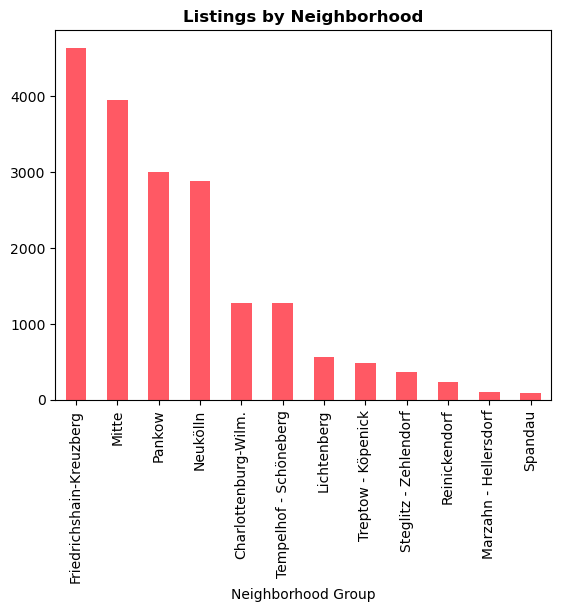

In [29]:
# Listings by Neighborhood

neighborhoods = sub_berlin_clean['Neighborhood Group'].value_counts(dropna=False).plot.bar(color='#FF5964')
plt.title('Listings by Neighborhood', fontweight = 'bold')

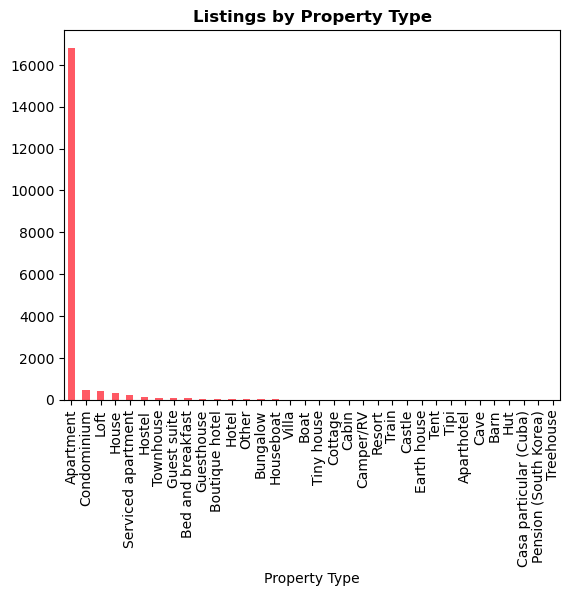

In [30]:
# Listings by Property Type

listings_by_property = sub_berlin_clean['Property Type'].value_counts(dropna=False).plot.bar(color='#FF5964')
plt.title('Listings by Property Type', fontweight = 'bold')
plt.show()

Text(0.5, 1.0, 'Listings by Room Type')

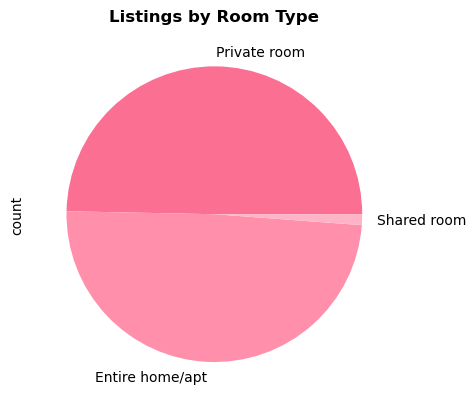

In [31]:
# Listings by Room Type

colors_pie = ['#fb6f92', '#ff8fab', '#ffb3c6']
listings_by_room = sub_berlin_clean['Room Type'].value_counts(dropna=False).plot.pie(colors=colors_pie)
plt.title('Listings by Room Type', fontweight = 'bold')

Text(0.5, 1.0, 'Listings by Price')

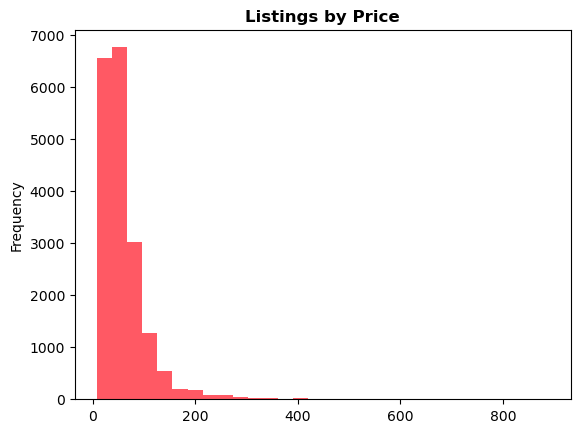

In [32]:
# Price histogram chart

hist_price = sub_berlin_clean['Price'].plot.hist(bins = 30, color='#FF5964')
plt.title('Listings by Price', fontweight = 'bold')

## Exporting charts and subset

In [33]:
sub_berlin_clean.to_csv(os.path.join(path, '2. Data', 'Prepared', 'airbnb_berlin_listings.csv'), index = False)

In [34]:
neighborhoods.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'neighborhoods.png'))

In [35]:
listings_by_property.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'listings_by_property.png'))

In [36]:
listings_by_room.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'listings_by_room.png'))

In [37]:
hist_price.figure.savefig(os.path.join(path, '4. Analysis','Visualizations', 'price_histogram.png'))